# /!\ This solution is ​​a naive solution

# Execute the code below

In [159]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data//weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data//weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [160]:
# merge both dataframes, we use a left join because our df_main is the one that includes all days of the year :

df2018 = df_main.merge(df_opinion, how = 'left', left_on = 'DATE', right_on = 'date')
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,very bad


In [161]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [162]:
# we drop the column date on our new dataframe

df2018.drop(columns = 'date', inplace = True)

In [163]:
df2018.info()

# we note that there are some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [164]:
# we can check the numbers of missing values for each columns of the df

df2018.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64

In [165]:
# we create a cleaned dataframe by dropping the rows with missing values :

# we save it in a new dataframe
df_clean = df2018.dropna()

# we check the result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    341 non-null    object 
 1   MAX_TEMPERATURE_C       341 non-null    int64  
 2   MIN_TEMPERATURE_C       341 non-null    int64  
 3   WINDSPEED_MAX_KMH       341 non-null    int64  
 4   TEMPERATURE_MORNING_C   341 non-null    int64  
 5   TEMPERATURE_NOON_C      341 non-null    int64  
 6   TEMPERATURE_EVENING_C   341 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     341 non-null    float64
 8   HUMIDITY_MAX_PERCENT    341 non-null    int64  
 9   VISIBILITY_AVG_KM       341 non-null    float64
 10  PRESSURE_MAX_MB         341 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  341 non-null    float64
 12  HEATINDEX_MAX_C         341 non-null    int64  
 13  DEWPOINT_MAX_C          341 non-null    int64  
 14  WINDTEMP_MAX_C          341 non-null    in

In [166]:
# when we check out missing values there are none
df_clean.isna().sum()

DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
dtype: int64

In [167]:
# we create a dataframe with rows missing values

cond = df2018["SUNHOUR"].isna() # we need to know which rows from column SUNHOUR are nan values
df_nan = df2018[cond] # we select only data from df where our condition is True
# this dataframe will serve to predict missing values on the SUNHOUR column

df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

## Now, train your model
For this part, let's work on df_clean.
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [168]:
# Your code here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [169]:
# we can only use numeric explanatory variables,
# when making predictions these variables must not contain nan values
# so we must not take into account columns from our df_nan with nan values

# we determine what are the columns to remove from our explanatory variables
df_clean_numeric = df_clean.select_dtypes('number')

# we keep only the numeric datas with no nan values
# our target SUNHOUR is among the columns that contains nan values in our df_nan, so it will not be included
X = df_clean_numeric.loc[:, df_nan.notna().any()]

y = df_clean['SUNHOUR']

# we split the dataset into 4 datasets :
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)  # default train size is 0.75

# we fit the model :
model_train = LinearRegression()
model_train.fit(X_train, y_train)

# we score our datasets :
print("Score for the train dataset :", model_train.score(X_train, y_train))
print("Score for the test dataset :", model_train.score(X_test, y_test))

Score for the train dataset : 0.748462774957318
Score for the test dataset : 0.686796935846461


In [170]:
# both scores are high and close to each other, there is no underfitting and slight overfitting

In [171]:
column_coefs = list(zip(X.columns, model_train.coef_))

# sorted(column_coefs, key=lambda x: x[1])
column_coefs.sort(key=lambda x: x[1], reverse=True)
column_coefs

[('TEMPERATURE_EVENING_C', 0.47270309877253014),
 ('TEMPERATURE_MORNING_C', 0.4097846277708651),
 ('HEATINDEX_MAX_C', 0.13882803499733848),
 ('TEMPERATURE_NOON_C', 0.11387734619681739),
 ('DEWPOINT_MAX_C', 0.10488660770697689),
 ('WINDTEMP_MAX_C', 0.1037452098303966),
 ('WINDSPEED_MAX_KMH', -0.007154248119719694),
 ('HUMIDITY_MAX_PERCENT', -0.031184962877397818),
 ('CLOUDCOVER_AVG_PERCENT', -0.08897596854368876),
 ('PRESSURE_MAX_MB', -0.09201236215398949),
 ('PRECIP_TOTAL_DAY_MM', -0.12951949001248475),
 ('MIN_TEMPERATURE_C', -0.48017254388162683),
 ('VISIBILITY_AVG_KM', -0.499915514888611),
 ('MAX_TEMPERATURE_C', -0.6987964572434644)]

In [172]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)


In [173]:
# we fit the model :
model_train_scaled = LinearRegression()
model_train_scaled.fit(X_train_scaled, y_train)

# we score our datasets :
print("Score for the train dataset :", model_train_scaled.score(X_train_scaled, y_train))
print("Score for the test dataset :", model_train_scaled.score(X_test_scaled, y_test))

Score for the train dataset : 0.7484627749573183
Score for the test dataset : 0.6867969358464607


In [174]:
column_coefs = list(zip(X.columns, model_train_scaled.coef_))

# sorted(column_coefs, key=lambda x: x[1])
column_coefs.sort(key=lambda x: x[1], reverse=True)
column_coefs

[('TEMPERATURE_EVENING_C', 14.653796061948439),
 ('TEMPERATURE_MORNING_C', 11.473969577584255),
 ('HEATINDEX_MAX_C', 4.581325154912172),
 ('WINDTEMP_MAX_C', 3.9423179735550544),
 ('TEMPERATURE_NOON_C', 3.416320385904496),
 ('DEWPOINT_MAX_C', 2.3075053695535015),
 ('WINDSPEED_MAX_KMH', -0.40063789470429634),
 ('PRECIP_TOTAL_DAY_MM', -1.9816481971910072),
 ('HUMIDITY_MAX_PERCENT', -2.058207549908263),
 ('VISIBILITY_AVG_KM', -3.624387482942437),
 ('PRESSURE_MAX_MB', -4.416593383391483),
 ('CLOUDCOVER_AVG_PERCENT', -8.88647485830091),
 ('MIN_TEMPERATURE_C', -12.484486140922284),
 ('MAX_TEMPERATURE_C', -20.96389371730393)]

## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [175]:
df_nan.notna().any()

DATE                       True
MAX_TEMPERATURE_C          True
MIN_TEMPERATURE_C          True
WINDSPEED_MAX_KMH          True
TEMPERATURE_MORNING_C      True
TEMPERATURE_NOON_C         True
TEMPERATURE_EVENING_C      True
PRECIP_TOTAL_DAY_MM        True
HUMIDITY_MAX_PERCENT       True
VISIBILITY_AVG_KM          True
PRESSURE_MAX_MB            True
CLOUDCOVER_AVG_PERCENT     True
HEATINDEX_MAX_C            True
DEWPOINT_MAX_C             True
WINDTEMP_MAX_C             True
WEATHER_CODE_EVENING      False
TOTAL_SNOW_MM             False
UV_INDEX                  False
SUNHOUR                   False
OPINION                   False
dtype: bool

In [184]:
# Your code here :


X_topred = df_nan.select_dtypes('number').loc[:,X_train.columns]

df_nan['SUNHOUR'] = model_train.predict(X_topred)
df_nan['flag'] = 'predicted values'  # we add a column to flag the predicted values
df_nan.head()

C:\Users\luca5\AppData\Local\Temp\ipykernel_3676\958022082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['SUNHOUR'] = model_train.predict(X_topred)
C:\Users\luca5\AppData\Local\Temp\ipykernel_3676\958022082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['flag'] = 'predicted values'  # we add a column to flag the predicted values


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,...,37.000,10,6,5,NaN,NaN,NaN,7.404351,NaN,predicted values
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,...,39.500,8,3,2,NaN,NaN,NaN,8.123330,NaN,predicted values
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,...,52.625,13,7,6,NaN,NaN,NaN,7.631020,NaN,predicted values
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,...,59.125,15,10,10,NaN,NaN,NaN,9.596273,NaN,predicted values
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,...,85.000,10,9,7,NaN,NaN,NaN,6.326108,NaN,predicted values


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values.

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

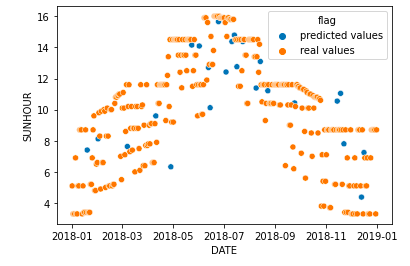

In [178]:
# Your code here
df_clean['flag'] = "real values" # we add a column to flag the real values

C:\Users\luca5\AppData\Local\Temp\ipykernel_3676\3590001761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['flag'] = "real values" # we add a column to flag the real values


In [179]:
# we can know put clean dataframe with real values and nan dataframe with predicted values in the same dataframe
df2018complete = pd.concat([df_clean, df_nan])

In [180]:
df2018complete.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,...,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,...,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,real values


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

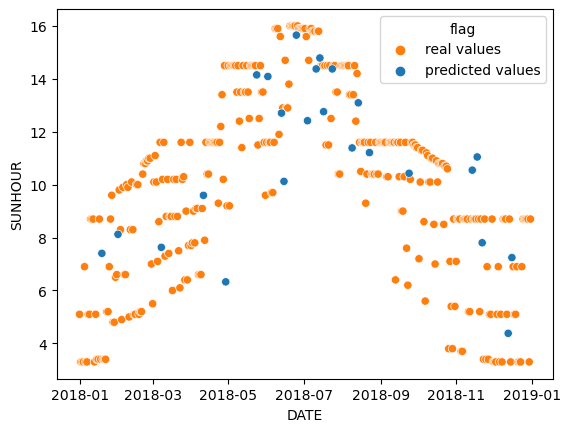

In [182]:
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])

sns.scatterplot(data = df2018complete,
                x = 'DATE',
                y = 'SUNHOUR',
                hue = 'flag',
                palette = ['tab:orange', 'tab:blue'])

plt.show()